In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
import matplotlib
from matplotlib import colormaps
warnings.filterwarnings("ignore", category=FutureWarning)



## 1. Input CEEW Data 

In [72]:
columns_to_include = ['x_Timestamp', 't_kWh','meter']

df00 = pd.read_csv('CEEW - Smart meter data Mathura 2019.csv', parse_dates=['x_Timestamp'], index_col='x_Timestamp',usecols=columns_to_include)
df10 = pd.read_csv('CEEW - Smart meter data Mathura 2020.csv', parse_dates=['x_Timestamp'], index_col='x_Timestamp',usecols=columns_to_include)
df11 = pd.read_csv('CEEW - Smart meter data Mathura 2021.csv', parse_dates=['x_Timestamp'], index_col='x_Timestamp',usecols=columns_to_include)
dfm = pd.concat([df00,df10, df11])
dfm.info()

df22 = pd.read_csv('CEEW - Smart meter data Bareilly 2019.csv', parse_dates=['x_Timestamp'], index_col='x_Timestamp',usecols=columns_to_include)
df20 = pd.read_csv('CEEW - Smart meter data Bareilly 2020.csv', parse_dates=['x_Timestamp'], index_col='x_Timestamp',usecols=columns_to_include)
df21 = pd.read_csv('CEEW - Smart meter data Bareilly 2021.csv', parse_dates=['x_Timestamp'], index_col='x_Timestamp',usecols=columns_to_include)
dfb = pd.concat([df22, df20, df21])

df = pd.concat([dfm, dfb])
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7898794 entries, 2019-05-01 00:00:00 to 2021-02-18 23:57:00
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   t_kWh   float64
 1   meter   object 
dtypes: float64(1), object(1)
memory usage: 180.8+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21394429 entries, 2019-05-01 00:00:00 to 2021-03-03 23:57:00
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   t_kWh   float64
 1   meter   object 
dtypes: float64(1), object(1)
memory usage: 489.7+ MB


In [73]:
df.head()

,t_kWh,meter
x_Timestamp,,
2019-05-01 00:00:00,0.017,MH01
2019-05-01 00:03:00,0.016,MH01
2019-05-01 00:06:00,0.016,MH01
2019-05-01 00:09:00,0.016,MH01
2019-05-01 00:12:00,0.015,MH01


In [74]:
len(dfm), len(dfb)

(7898794, 13495635)

## 2. Exploration and Pre-processing

In [75]:
df = df.dropna(subset=['t_kWh'])
meters = df['meter'].unique()
n=len(meters)
print("No. of unique meters :", n)
df.info()

No. of unique meters : 84
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21394429 entries, 2019-05-01 00:00:00 to 2021-03-03 23:57:00
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   t_kWh   float64
 1   meter   object 
dtypes: float64(1), object(1)
memory usage: 489.7+ MB


In [76]:
df['t_kWh'].describe()

count    2.139443e+07
mean     1.707523e-02
std      2.477232e-02
min      0.000000e+00
25%      2.000000e-03
50%      9.000000e-03
75%      2.000000e-02
max      3.000000e-01
Name: t_kWh, dtype: float64

## 4. Hourly Resampling 

In [77]:
df_meter_resampled = df.groupby('meter')['t_kWh'].resample('H').sum()

In [78]:
df_meter_resampled

meter  x_Timestamp        
BR02   2019-07-10 00:00:00    0.405
       2019-07-10 01:00:00    0.446
       2019-07-10 02:00:00    0.447
       2019-07-10 03:00:00    0.450
       2019-07-10 04:00:00    0.454
                              ...  
MH47   2021-02-18 19:00:00    0.011
       2021-02-18 20:00:00    0.007
       2021-02-18 21:00:00    0.013
       2021-02-18 22:00:00    0.011
       2021-02-18 23:00:00    0.008
Name: t_kWh, Length: 1350625, dtype: float64

In [79]:
df_meter_resampled.info()

<class 'pandas.core.series.Series'>
MultiIndex: 1350625 entries, ('BR02', Timestamp('2019-07-10 00:00:00')) to ('MH47', Timestamp('2021-02-18 23:00:00'))
Series name: t_kWh
Non-Null Count    Dtype  
--------------    -----  
1350625 non-null  float64
dtypes: float64(1)
memory usage: 14.8+ MB


In [80]:
df_meter_resampled = df_meter_resampled.reset_index()
df_meter_resampled.columns = ['meter', 'x_Timestamp', 't_kWh']

In [81]:
df_meter_resampled

,meter,x_Timestamp,t_kWh
0,BR02,2019-07-10 00:00:00,0.405
1,BR02,2019-07-10 01:00:00,0.446
2,BR02,2019-07-10 02:00:00,0.447
3,BR02,2019-07-10 03:00:00,0.450
4,BR02,2019-07-10 04:00:00,0.454
...,...,...,...
1350620,MH47,2021-02-18 19:00:00,0.011
1350621,MH47,2021-02-18 20:00:00,0.007
1350622,MH47,2021-02-18 21:00:00,0.013
1350623,MH47,2021-02-18 22:00:00,0.011


In [82]:
df_meter_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350625 entries, 0 to 1350624
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   meter        1350625 non-null  object        
 1   x_Timestamp  1350625 non-null  datetime64[ns]
 2   t_kWh        1350625 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 30.9+ MB


# 5. Average load profile of meters from entire duration

###  Load Profile Processing

In [83]:
df_meter_resampled['date'] = df_meter_resampled['x_Timestamp'].dt.date
df_meter_resampled['hour'] = df_meter_resampled['x_Timestamp'].dt.hour

In [84]:
df_meter_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350625 entries, 0 to 1350624
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   meter        1350625 non-null  object        
 1   x_Timestamp  1350625 non-null  datetime64[ns]
 2   t_kWh        1350625 non-null  float64       
 3   date         1350625 non-null  object        
 4   hour         1350625 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 46.4+ MB


In [85]:
df_meter_resampled

,meter,x_Timestamp,t_kWh,date,hour
0,BR02,2019-07-10 00:00:00,0.405,2019-07-10,0
1,BR02,2019-07-10 01:00:00,0.446,2019-07-10,1
2,BR02,2019-07-10 02:00:00,0.447,2019-07-10,2
3,BR02,2019-07-10 03:00:00,0.450,2019-07-10,3
4,BR02,2019-07-10 04:00:00,0.454,2019-07-10,4
...,...,...,...,...,...
1350620,MH47,2021-02-18 19:00:00,0.011,2021-02-18,19
1350621,MH47,2021-02-18 20:00:00,0.007,2021-02-18,20
1350622,MH47,2021-02-18 21:00:00,0.013,2021-02-18,21
1350623,MH47,2021-02-18 22:00:00,0.011,2021-02-18,22


In [86]:
df_pivot = df_meter_resampled.pivot_table(
    index=['meter', 'date'], 
    columns='hour', 
    values='t_kWh', 
    aggfunc='sum'
)

In [87]:
df_pivot

hour                 0      1      2      3      4      5      6      7   \
meter date                                                                 
BR02  2019-07-10  0.405  0.446  0.447  0.450  0.454  0.454  0.288  0.263   
      2019-07-11  0.128  0.033  0.085  0.001  0.000  0.000  0.000  0.000   
      2019-07-12  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
      2019-07-13  0.502  0.498  0.493  0.490  0.462  0.334  0.296  0.252   
      2019-07-14  0.477  0.437  0.405  0.343  0.301  0.108  0.165  0.093   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
MH47  2021-02-14  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-15  0.007  0.002  0.000  0.000  0.000  0.000  0.006  0.001   
      2021-02-16  0.004  0.000  0.000  0.000  0.000  0.000  0.006  0.001   
      2021-02-17  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-18  0.005  0.001  0.000  0.000  0.000  0.000  0.004  0.000   

hour                 8      9   ...     14     15     16     17     18     19  \
meter date                      ...                                             
BR02  2019-07-10  0.239  0.298  ...  0.257  0.219  0.124  0.154  0.442  0.127   
      2019-07-11  0.000  0.000  ...  0.516  0.399  0.428  0.402  0.321  0.303   
      2019-07-12  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
      2019-07-13  0.141  0.571  ...  0.253  0.250  0.187  0.100  0.000  0.000   
      2019-07-14  0.059  0.040  ...  0.032  0.213  0.000  0.000  0.000  0.413   
...                 ...    ...  ...    ...    ...    ...    ...    ...    ...   
MH47  2021-02-14  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-15  0.000  0.018  ...  0.011  0.010  0.009  0.011  0.011  0.009   
      2021-02-16  0.000  0.002  ...  0.011  0.011  0.010  0.010  0.012  0.013   
      2021-02-17  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-18  0.000  0.001  ...  0.010  0.008  0.004  0.002  0.011  0.011   

hour                 20     21     22     23  
meter date                                    
BR02  2019-07-10  0.221  0.309  0.378  0.216  
      2019-07-11  0.348  0.108  0.001  0.000  
      2019-07-12  0.000  0.000  0.000  0.000  
      2019-07-13  0.000  0.000  0.007  0.434  
      2019-07-14  0.139  0.388  0.429  0.432  
...                 ...    ...    ...    ...  
MH47  2021-02-14  0.000  0.000  0.000  0.000  
      2021-02-15  0.011  0.011  0.015  0.008  
      2021-02-16  0.011  0.012  0.016  0.010  
      2021-02-17  0.000  0.000  0.000  0.000  
      2021-02-18  0.007  0.013  0.011  0.008  

[56277 rows x 24 columns]

###  Data Cleaning

In [88]:
df_cleaned = df_pivot.copy()
hourly_columns = list(range(24))

# Filter rows where the sum of all hourly values is greater than zero
df_cleaned = df_cleaned[df_cleaned[hourly_columns].sum(axis=1) > 0]

df_pivot = df_cleaned.copy()
df_pivot

hour                 0      1      2      3      4      5      6      7   \
meter date                                                                 
BR02  2019-07-10  0.405  0.446  0.447  0.450  0.454  0.454  0.288  0.263   
      2019-07-11  0.128  0.033  0.085  0.001  0.000  0.000  0.000  0.000   
      2019-07-13  0.502  0.498  0.493  0.490  0.462  0.334  0.296  0.252   
      2019-07-14  0.477  0.437  0.405  0.343  0.301  0.108  0.165  0.093   
      2019-07-15  0.450  0.431  0.393  0.386  0.384  0.029  0.095  0.114   
...                 ...    ...    ...    ...    ...    ...    ...    ...   
MH47  2021-02-07  0.005  0.002  0.000  0.000  0.000  0.000  0.003  0.002   
      2021-02-09  0.007  0.003  0.000  0.000  0.000  0.000  0.000  0.000   
      2021-02-15  0.007  0.002  0.000  0.000  0.000  0.000  0.006  0.001   
      2021-02-16  0.004  0.000  0.000  0.000  0.000  0.000  0.006  0.001   
      2021-02-18  0.005  0.001  0.000  0.000  0.000  0.000  0.004  0.000   

hour                 8      9   ...     14     15     16     17     18     19  \
meter date                      ...                                             
BR02  2019-07-10  0.239  0.298  ...  0.257  0.219  0.124  0.154  0.442  0.127   
      2019-07-11  0.000  0.000  ...  0.516  0.399  0.428  0.402  0.321  0.303   
      2019-07-13  0.141  0.571  ...  0.253  0.250  0.187  0.100  0.000  0.000   
      2019-07-14  0.059  0.040  ...  0.032  0.213  0.000  0.000  0.000  0.413   
      2019-07-15  0.051  0.167  ...  0.304  0.053  0.000  0.000  0.054  0.271   
...                 ...    ...  ...    ...    ...    ...    ...    ...    ...   
MH47  2021-02-07  0.000  0.000  ...  0.006  0.000  0.008  0.011  0.011  0.007   
      2021-02-09  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.003  0.011   
      2021-02-15  0.000  0.018  ...  0.011  0.010  0.009  0.011  0.011  0.009   
      2021-02-16  0.000  0.002  ...  0.011  0.011  0.010  0.010  0.012  0.013   
      2021-02-18  0.000  0.001  ...  0.010  0.008  0.004  0.002  0.011  0.011   

hour                 20     21     22     23  
meter date                                    
BR02  2019-07-10  0.221  0.309  0.378  0.216  
      2019-07-11  0.348  0.108  0.001  0.000  
      2019-07-13  0.000  0.000  0.007  0.434  
      2019-07-14  0.139  0.388  0.429  0.432  
      2019-07-15  0.172  0.169  0.216  0.233  
...                 ...    ...    ...    ...  
MH47  2021-02-07  0.011  0.011  0.009  0.007  
      2021-02-09  0.011  0.011  0.009  0.007  
      2021-02-15  0.011  0.011  0.015  0.008  
      2021-02-16  0.011  0.012  0.016  0.010  
      2021-02-18  0.007  0.013  0.011  0.008  

[43689 rows x 24 columns]

### Load Profile Analysis

In [89]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 43689 entries, ('BR02', datetime.date(2019, 7, 10)) to ('MH47', datetime.date(2021, 2, 18))
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43688 non-null  float64
 1   1       43688 non-null  float64
 2   2       43688 non-null  float64
 3   3       43688 non-null  float64
 4   4       43688 non-null  float64
 5   5       43688 non-null  float64
 6   6       43688 non-null  float64
 7   7       43688 non-null  float64
 8   8       43688 non-null  float64
 9   9       43688 non-null  float64
 10  10      43688 non-null  float64
 11  11      43688 non-null  float64
 12  12      43688 non-null  float64
 13  13      43688 non-null  float64
 14  14      43688 non-null  float64
 15  15      43688 non-null  float64
 16  16      43688 non-null  float64
 17  17      43688 non-null  float64
 18  18      43688 non-null  float64
 19  19      43688 non-null  float64
 20  20    

In [90]:
df_copy = df_pivot.copy()

df_copy = df_copy.reset_index()
df_copy['date'] = pd.to_datetime(df_copy['date'])

df_copy['year'] = df_copy['date'].dt.year
df_copy['month'] = df_copy['date'].dt.month
df_copy['week'] = df_copy['date'].dt.isocalendar().week

### 5.c Average load profile of meters from entire duration

In [91]:
df_copy

hour,meter,date,0,1,2,3,4,5,6,7,...,17,18,19,20,21,22,23,year,month,week
0,BR02,2019-07-10,0.405,0.446,0.447,0.450,0.454,0.454,0.288,0.263,...,0.154,0.442,0.127,0.221,0.309,0.378,0.216,2019,7,28
1,BR02,2019-07-11,0.128,0.033,0.085,0.001,0.000,0.000,0.000,0.000,...,0.402,0.321,0.303,0.348,0.108,0.001,0.000,2019,7,28
2,BR02,2019-07-13,0.502,0.498,0.493,0.490,0.462,0.334,0.296,0.252,...,0.100,0.000,0.000,0.000,0.000,0.007,0.434,2019,7,28
3,BR02,2019-07-14,0.477,0.437,0.405,0.343,0.301,0.108,0.165,0.093,...,0.000,0.000,0.413,0.139,0.388,0.429,0.432,2019,7,28
4,BR02,2019-07-15,0.450,0.431,0.393,0.386,0.384,0.029,0.095,0.114,...,0.000,0.054,0.271,0.172,0.169,0.216,0.233,2019,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43684,MH47,2021-02-07,0.005,0.002,0.000,0.000,0.000,0.000,0.003,0.002,...,0.011,0.011,0.007,0.011,0.011,0.009,0.007,2021,2,5
43685,MH47,2021-02-09,0.007,0.003,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.003,0.011,0.011,0.011,0.009,0.007,2021,2,6
43686,MH47,2021-02-15,0.007,0.002,0.000,0.000,0.000,0.000,0.006,0.001,...,0.011,0.011,0.009,0.011,0.011,0.015,0.008,2021,2,7
43687,MH47,2021-02-16,0.004,0.000,0.000,0.000,0.000,0.000,0.006,0.001,...,0.010,0.012,0.013,0.011,0.012,0.016,0.010,2021,2,7


<Figure size 4000x3000 with 0 Axes>

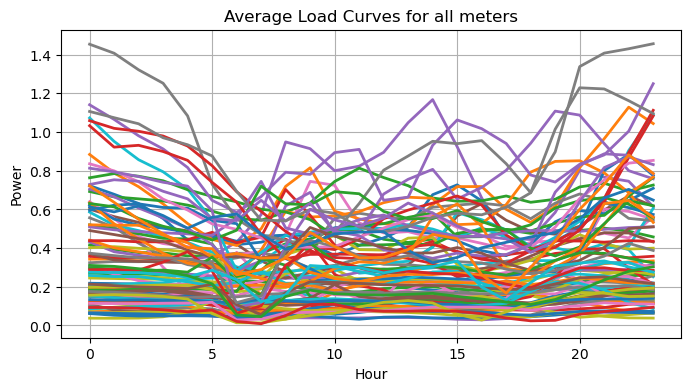

In [92]:
meters = df_copy['meter'].unique()
n = len(meters)
plt.figure(figsize=(40, 30))

meter_avg_curves = {}

for idx, meter in enumerate(meters, 1):  
    
    df_met = df_copy[df_copy['meter'] == meter].drop(columns=['year', 'month', 'meter', 'week'])
    df_met.set_index('date', inplace=True)
    Y = df_met.values
    met_avg = np.mean(Y, axis=0)
    meter_avg_curves[meter] = met_avg

plt.figure(figsize=(8, 4))

for meter, met_avg in meter_avg_curves.items():
    plt.plot(meter_avg_curves[meter], label=f'Month {month}', linewidth=2)

# Customize the plot for all monthly averages
plt.title(f'Average Load Curves for all meters')
plt.xlabel('Hour')
plt.ylabel('Power')
#plt.legend()
plt.grid(True)

In [93]:
meter_avg_curves

{'BR02': array([0.21845432, 0.2166963 , 0.21467407, 0.21297037, 0.20822222,
        0.20935802, 0.20614815, 0.19527654, 0.20732593, 0.2343679 ,
        0.23873086, 0.21965926, 0.2195284 , 0.19448148, 0.18341235,
        0.17009383, 0.15634815, 0.14748889, 0.15657531, 0.20460247,
        0.22125432, 0.24020494, 0.23724938, 0.22009383]),
 'BR03': array([0.34309653, 0.34352124, 0.34776834, 0.34494208, 0.3407027 ,
        0.31696525, 0.23356371, 0.16332432, 0.11741313, 0.12167568,
        0.12752124, 0.13982625, 0.16242085, 0.17311197, 0.16986873,
        0.15666409, 0.1493861 , 0.15990734, 0.19754054, 0.241     ,
        0.29104633, 0.319861  , 0.32821622, 0.33389189]),
 'BR04': array([0.41655959, 0.39382254, 0.37704404, 0.37550907, 0.35985492,
        0.35873964, 0.37332383, 0.37305181, 0.42248057, 0.44789249,
        0.49499093, 0.49185751, 0.44564637, 0.42930829, 0.44669041,
        0.46564896, 0.48799482, 0.49535622, 0.47619948, 0.48788472,
        0.49100777, 0.50342098, 0.48752591, 

In [94]:
X = np.array(list(meter_avg_curves.values()))

In [95]:
np.save('Xmeterav_total_ceew.npy', X)

In [ ]:
Xv = np.load()